# Entrerga

In [ ]:
class Polinomios :

  def __init__(self, L):
    self.coeffs = copy(L) #---- PROBLEMAS, argumentos por referencia.
    self.limpia()
    self.len = len(self.coeffs)
    self.grado = self.len - 1

  def limpia(self):
    while self.coeffs and self.coeffs[-1] == 0:
      self.coeffs.pop()

  def __repr__(self):
    return self.coeffs.__repr__()

  def __add__(self,other):
    s = max(self.len,other.len)
    L1 = self.coeffs + [0]*(s-self.len)
    L2 = other.coeffs + [0]*(s-other.len)
    return Polinomios([ L1[i] + L2[i] for i in range(s) ])

  def __add2__(self,other):
    s = min(self.len,other.len)
    C = [self.coeffs[i] + other.coeffs[i] for i in range(s) ]
    if self.len < other.len:
      return Polinomios (C + other.coeffs[s:])
    else:
      return Polinomios (C + self.coeffs[s:])

  def __neg__(self):
    return Polinomios ([- F for F in self.coeffs])

  def __sub__(self,other):
    return self + (-other)

  def __eq__(self,other):
    return self.coeffs == other.coeffs

  def __mul__(self,other):
    if not self.coeffs or not other.coeffs:
      return Polinomios([])
    return Polinomios(do_schoolbook(self,other))

def do_schoolbook(f,g):
  n = len(f)
  m = len(g)
  C = [anillo(0)] * (n+m-1)
  for i in range(n):
    for j in range(m):
        C[i+j] = C[i+j] + f[i]*g[j]
  return C

# No funciona
def do_karatsuba_clase(f,g):
  n0 = len(f)
  n = len(f)
  hago_pop = 0
  if n < 50 :
    return do_schoolbook(f,g)
  if n % 2 == 1:
    f = f+[0]
    g = g+[0]
    n = n+1
    hago_pop=1

  f0 = f[0:n//2]
  f1 = f[n//2:]
  g0 = g[0:n//2]
  g1 = g[n//2:]
  u = do_karatsuba(f0,g0)
  v = do_karatsuba(f1,g1)
  sf = [f0[i]+f1[i] for i in range(n//2)  ]
  sg = [g0[i]+g1[i] for i in range(n//2)  ]
  w = do_karatsuba(sf,sg)
  medio = [ w[i] - u[i] - v[i]  for i in range(len(w))  ]
  C = [0] * (2*n-1)
  for i in range(len(u)):
    C[i] = C[i] + u[i]
    C[n//2+i] = C[n//2+i] + medio[i]
    C[n+i] = C[n+i] + v[i]
  return C[:n0*2-1]

def do_karatsuba(f,g, K_threshold=8):
  n = len(f)
  n0 = n //2
  n1 = n - n0
  if n < K_threshold:
    return do_schoolbook(f,g)
  f0 = f[:n0] # tamaño n0
  f1 = f[n0:]  # tamaño n1
  g0 = g[:n0] # tamaño n0
  g1 = g[n0:]  # tamaño n1
  u = do_karatsuba(f0,g0, K_threshold) # tamaño 2*n0-1
  v = do_karatsuba(f1,g1, K_threshold) # tamaño 2*n1-1
  # Usamos f1, g1 como f0+f1,g0+g1 para evitar crear más listas
  # Fijaos que n1 >= n0
  for i in range(n0):
    f1[i] = f1[i]+f0[i]
    g1[i] = g1[i]+g0[i]
  w = do_karatsuba(f1,g1, K_threshold) # tamaño 2*n1-1
  # resto u y v a w, el problema es que los tamaños pueden ser distintos
  for i in range(2*n0-1):
    w[i] = w[i] - u[i] - v[i]
  for i in range(2*n0-1,2*n1-1):
    w[i] = w[i] - v[i]
  #C = [0] * (2*n-1)
  #for i in range(2*n0-1):
  #  C[i] = C[i] + u[i]
  #  C[n0+i] = C[n0+i] + w[i]
  #  C[2*n0+i] = C[2*n0+i] + v[i]
  #for i in range(2*n0-1,2*n1-1):
  #  C[n0+i] = C[n0+i] + w[i]
  #  C[2*n0+i] = C[2*n0+i] + v[i]
  #
  # u contiene los monomios de 0 a 2*n0-2
  # v contiene los monomios de 2*n0 a 2*n-1
  # solo nos falta el monomio 2*n0-1
  # podemos usarlo para evitar sumas en C
  C = u +[anillo(0)] +v
  for i in range(2*n1-1):
    C[n0+i] = C[n0+i] + w[i]
  return C

def do_karatsuba_different_size(left: list, right: list, K_threshold: int=8) -> list:
    """
    Multiplicación de dos polinomios de diferente grado, usando una
    estrategia de división del polinómio mayor en partes de tamaño
    del polinomio menor. Así, poder aplicar do_karatsuba a las partes.

    INPUT:

    - ``left``  -- representación de polinomio como lista
    - ``right`` -- representación de polinomio como lista
    - ``K_threshold`` -- Entero, se usa como criterio para usar la 
    multiplicación de la escuela si el el grado de alguno de los 
    polinómios es menor que él.

    TESTS:

    sage: do_karatsuba_different_size([anillo(1), anillo(2)], [anillo(3), anillo(4)])  # Grados iguales
    [3, 10, 8]

    sage: do_karatsuba_different_size([anillo(1), anillo(2), anillo(3)], [anillo(4), anillo(5)])  # n > m
    [4, 13, 22, 15]

    sage: do_karatsuba_different_size([anillo(3), anillo(4)], [anillo(1), anillo(2), anillo(3)])  # n < m
    [3, 10, 17, 12]

    sage: do_karatsuba_different_size([], [anillo(1), anillo(2), anillo(3)])  # Caso vacío
    []

    sage: do_karatsuba_different_size([anillo(1)], [anillo(1), anillo(2), anillo(3)])  # Caso n = 1
    [1, 2, 3]

    sage: do_karatsuba_different_size([anillo(1), anillo(2), anillo(3)], [anillo(1)])  # Caso m = 1
    [1, 2, 3]

    sage: do_karatsuba_different_size([anillo(1), anillo(2), anillo(3)], [anillo(4), anillo(5)], K_threshold=1)  # Caso K_threshold bajo
    [4, 13, 22, 15]

    """
    n: int= len(left); m: int= len(right)
    if n == 0 or m == 0:
        return []
    if n == 1:
        c = left[0]
        return [c*a for a in right]
    if m == 1:
        c = right[0]
        return [a*c for a in left] # beware of noncommutative rings
    
    if n <= K_threshold or m <= K_threshold or K_threshold==1 or K_threshold==2:
        return do_schoolbook(left, right)
    if n == m:
        return do_karatsuba(left, right, K_threshold)
    if n > m:
        # left is the bigger list
        # n is the bigger number
        q = n // m
        r = n % m
        output = do_karatsuba(left[:m], right, K_threshold)
        for i in range(1, q): #from 1 <= i < q:
            mi = m*i
            carry = do_karatsuba(left[mi:mi+m], right, K_threshold)
            for j in range(m-1):
                output[mi+j] = output[mi+j] + carry[j]
            output.extend(carry[m-1:])
        if r:
            mi = m*q
            carry = do_karatsuba_different_size(left[mi:], right, K_threshold)
            for j in range (m-1):
                output[mi+j] = output[mi+j] + carry[j]
            output.extend(carry[m-1:])
        return output
    else:
        # n < m, I need to repeat the code due to the case
        # of noncommutative rings.
        q = m // n
        r = m % n
        output = do_karatsuba(left, right[:n], K_threshold)
        for i in range(1,q): #from 1 <= i < q:
            mi = n*i
            carry = do_karatsuba(left, right[mi:mi+n], K_threshold)
            for j in range(n-1):
                output[mi+j] = output[mi+j] + carry[j]
            output.extend(carry[n-1:])
        if r:
            mi = n*q
            carry = do_karatsuba_different_size(left, right[mi:], K_threshold)
            for j in range(n-1):
                output[mi+j] = output[mi+j] + carry[j]
            output.extend(carry[n-1:])
        return output


NUM_SUMA = 0
NUM_PRODUCTO = 0

class anillo:
    def __init__(self, valor):
        self.valor = valor

    def __repr__(self):
        return repr(self.valor)

    def __add__(self, otro):
        global NUM_SUMA 
        NUM_SUMA = NUM_SUMA + 1
        return anillo(self.valor + otro.valor)

    def __sub__(self,otro):
        global NUM_SUMA 
        NUM_SUMA = NUM_SUMA + 1
        return anillo(self.valor - otro.valor)

    def __mul__(self, otro):
        global NUM_PRODUCTO
        NUM_PRODUCTO = NUM_PRODUCTO + 1
        return anillo(self.valor * otro.valor)


# Ejercicio

Crear unas listas donde sus entradas seantuplas de la forma:

(grado, num_sumas, num_multiplicaciones)



Una lista para el schoolbook y otra para karatsuba



tendremos una lsita de cuadramso mas menos para el metodo de la escula


para plotear 

line([(foo[0], foo[1]) for foo in L])

In [12]:
F=GF(11)
R=F['x']

poli_z= R.random_element(105)
poli_d= R.random_element(22)
RESULT= poli_z*poli_d
print(RESULT)


a= [anillo(i) for i in poli_z]
b= [anillo(i) for i in poli_d]
result=do_karatsuba_different_size(a,b)
r1=R([foo.valor for foo in result])
print(r1)



print(r1==RESULT)

print(NUM_SUMA, NUM_PRODUCTO)

4*x^127 + 3*x^126 + 9*x^125 + 2*x^124 + 5*x^123 + 3*x^122 + 5*x^121 + 3*x^120 + 3*x^119 + 7*x^118 + 4*x^117 + 9*x^116 + 10*x^115 + 4*x^114 + 9*x^113 + 4*x^112 + 2*x^111 + 9*x^110 + 8*x^109 + 4*x^108 + 8*x^107 + 6*x^105 + x^104 + 9*x^103 + 10*x^102 + 10*x^101 + 8*x^100 + 10*x^99 + 4*x^97 + 5*x^96 + 7*x^95 + 5*x^94 + 7*x^93 + 8*x^91 + 8*x^90 + 9*x^89 + 7*x^88 + 2*x^87 + 7*x^86 + 8*x^85 + 8*x^84 + 4*x^83 + 6*x^82 + 2*x^81 + 8*x^80 + 8*x^79 + 2*x^78 + 8*x^77 + 10*x^76 + 5*x^75 + 9*x^74 + 5*x^73 + 6*x^72 + 3*x^71 + x^70 + 8*x^69 + x^68 + 10*x^66 + 5*x^65 + 5*x^64 + 6*x^63 + 6*x^62 + 10*x^61 + 8*x^60 + x^59 + 2*x^57 + 8*x^56 + 3*x^55 + 5*x^54 + x^53 + 3*x^52 + 10*x^51 + 10*x^49 + 2*x^48 + 9*x^47 + 6*x^46 + 7*x^45 + 6*x^44 + 10*x^43 + 6*x^42 + 4*x^41 + 9*x^40 + 4*x^39 + 3*x^38 + x^37 + 3*x^36 + 3*x^35 + 8*x^34 + 6*x^33 + 3*x^32 + 9*x^31 + 2*x^30 + 8*x^29 + 8*x^28 + 4*x^27 + 7*x^26 + 4*x^25 + 6*x^24 + 2*x^23 + 9*x^22 + 9*x^21 + 2*x^20 + 6*x^19 + 10*x^18 + 2*x^17 + x^16 + 5*x^15 + 10*x^14 + 3*x

In [ ]:
print(list(range(5))[:4])

[0, 1, 2, 3]


In [ ]:
R=GF(11)
A=[]
B=[]

g=[1]*1000
for i in range(10**3):
    f = [anillo(R(1)) for t in range(i)]
    # print(f)
    NUM_SUMA = 0
    NUM_PRODUCTO = 0
    h=do_schoolbook(f,f)
    A.append((i,NUM_SUMA,NUM_PRODUCTO))

    NUM_SUMA = 0
    NUM_PRODUCTO = 0
    h=do_karatsuba(f,f)
    B.append((i,NUM_SUMA,NUM_PRODUCTO))
    if i%50 == 0:
        print(i)




0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [ ]:
print(A)
print(B)
line([[(0,0), (1,1)],[(1,0), (1,1)]])

[(0, 0, 0), (1, 1, 1), (2, 4, 4), (3, 9, 9), (4, 16, 16), (5, 25, 25), (6, 36, 36), (7, 49, 49), (8, 64, 64), (9, 81, 81), (10, 100, 100), (11, 121, 121), (12, 144, 144), (13, 169, 169), (14, 196, 196), (15, 225, 225), (16, 256, 256), (17, 289, 289), (18, 324, 324), (19, 361, 361), (20, 400, 400), (21, 441, 441), (22, 484, 484), (23, 529, 529), (24, 576, 576), (25, 625, 625), (26, 676, 676), (27, 729, 729), (28, 784, 784), (29, 841, 841), (30, 900, 900), (31, 961, 961), (32, 1024, 1024), (33, 1089, 1089), (34, 1156, 1156), (35, 1225, 1225), (36, 1296, 1296), (37, 1369, 1369), (38, 1444, 1444), (39, 1521, 1521), (40, 1600, 1600), (41, 1681, 1681), (42, 1764, 1764), (43, 1849, 1849), (44, 1936, 1936), (45, 2025, 2025), (46, 2116, 2116), (47, 2209, 2209), (48, 2304, 2304), (49, 2401, 2401), (50, 2500, 2500), (51, 2601, 2601), (52, 2704, 2704), (53, 2809, 2809), (54, 2916, 2916), (55, 3025, 3025), (56, 3136, 3136), (57, 3249, 3249), (58, 3364, 3364), (59, 3481, 3481), (60, 3600, 3600), (61

TypeError: float() argument must be a string or a real number, not 'tuple'

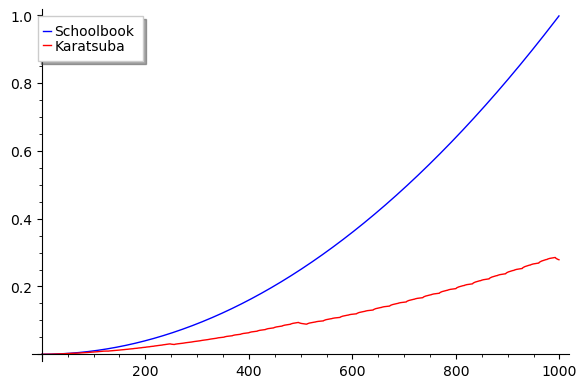

In [ ]:
# print([(foo[0], foo[1]) for foo in A])
# print([(foo[0], foo[1]) for foo in B])
line([(foo[0], foo[1]) for foo in A], color='blue', legend_label='Schoolbook') + line([(foo[0], foo[1]) for foo in B], color='red', legend_label='Karatsuba')



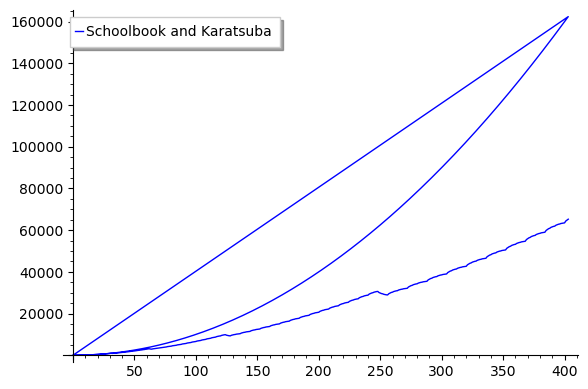

In [ ]:
line([(foo[0], foo[1]) for foo in A] + [(foo[0], foo[1]) for foo in B], legend_label='Schoolbook and Karatsuba')

In [ ]:
x=0 if 1>0 else 1

In [ ]:
x

0

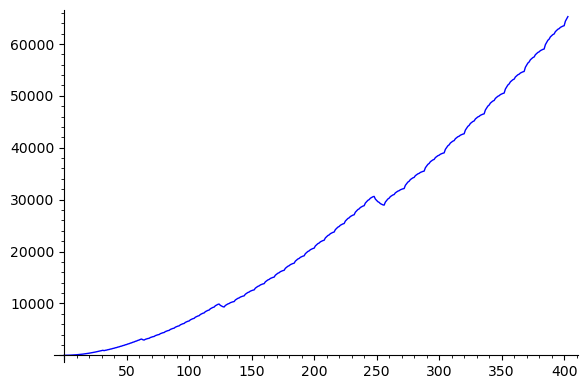

In [ ]:
line([(foo[0], foo[1]) for foo in B])

In [ ]:
#Queremos que los elementos sean instancias de anillo, no de R
R=QQ['x']
n = 11
lista=[1]
l1= [anillo(lista*i) for i in range(1,n)]
l2= [anillo(lista*i) for i in range(1,n)]


lf = [do_schoolbook(fo, foo) for fo, foo in zip(l1,l2)]


print(lf)




TypeError: object of type 'anillo' has no len()